In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/data

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
df.drop(columns=['gross margin percentage'], inplace=True)

In [7]:
df.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

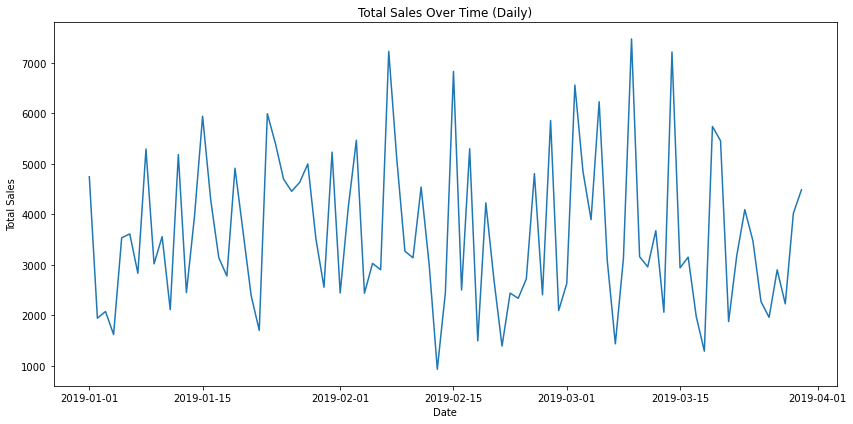

In [14]:
def plot_total_sales(df):
    """
    Plot to visualize total sales over time on a daily basis.

    Returns: Line Plot
    """
    df['Date'] = pd.to_datetime(df['Date'])
    daily_sales = df.groupby('Date')['Total'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['Date'], daily_sales['Total'])
    plt.title('Total Sales Over Time (Daily)')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()
    
plot_total_sales(df)

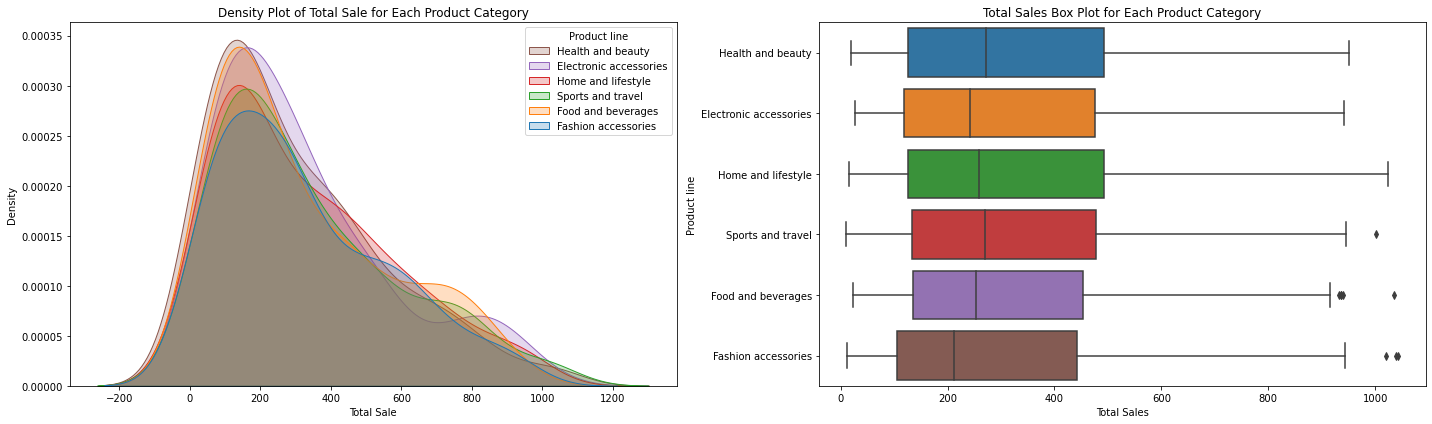

In [15]:
def plot_density_and_box_plots(df):
    """
    Plots density and box plots for the total sales of each product category.

    Returns: Density and box plots
     
    """
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    # Density plot
    sns.kdeplot(data=df, hue='Product line', x='Total', fill=True, ax=axs[0])
    axs[0].set_title('Density Plot of Total Sale for Each Product Category')
    axs[0].set_xlabel('Total Sale')
    axs[0].set_ylabel('Density')
    axs[0].legend(title='Product line', labels=['Health and beauty', 'Electronic accessories', 'Home and lifestyle',
                                                'Sports and travel', 'Food and beverages', 'Fashion accessories'])

    # Box plot
    sns.boxplot(data=df, x='Total', y='Product line', orient='h', ax=axs[1])
    axs[1].set_title('Total Sales Box Plot for Each Product Category')
    axs[1].set_xlabel('Total Sales')
    axs[1].set_ylabel('Product line')

    plt.tight_layout()
    plt.show()

plot_density_and_box_plots(df)

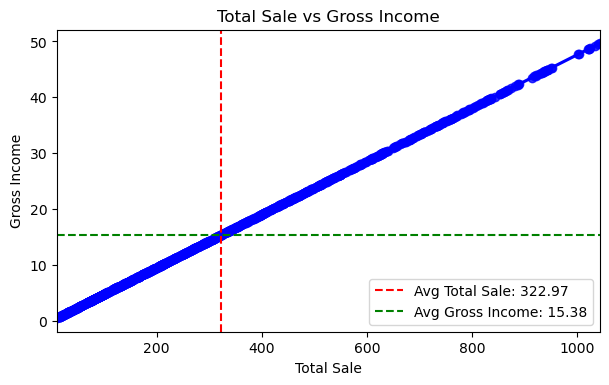

In [16]:
def plot_regplot(df):
    """
    Plot to visualize the relationship between total sale and gross income.

    Returns: Regression plot
    """
    avg_total_sales = df['Total'].mean()
    avg_gross_income = df['gross income'].mean()
    plt.figure(figsize=(7, 4), dpi=100)
    sns.regplot(x='Total', y='gross income', data=df, color='blue')
    plt.xlabel('Total Sale')
    plt.ylabel('Gross Income')
    plt.title('Total Sale vs Gross Income')
    plt.axvline(x=avg_total_sales, color='red', linestyle='--', label=f'Avg Total Sale: {avg_total_sales:.2f}')
    plt.axhline(y=avg_gross_income, color='green', linestyle='--', label=f'Avg Gross Income: {avg_gross_income:.2f}')
    plt.legend()
    plt.show()

plot_regplot(df)

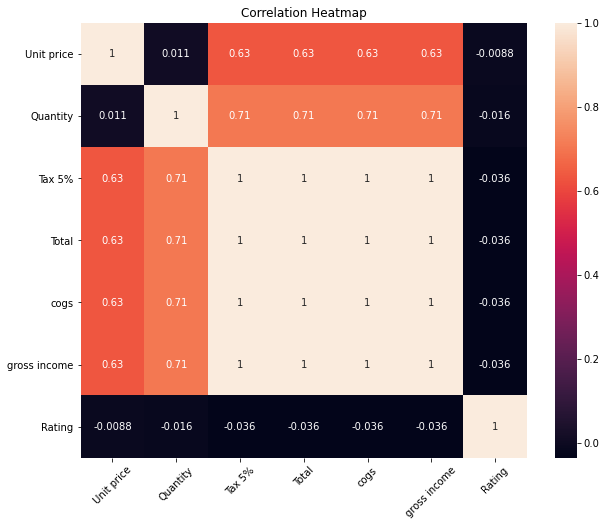

In [18]:
def correlation_heatmap(df):
    """
    Plot to visualize the correlation among features.

    Returns: Correlation heatmap
    """
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(corr_matrix, annot=True)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
    plt.title('Correlation Heatmap')
    plt.show()

correlation_heatmap(df)